# Genre recognition: experiment

Goal: Test if we have an edge with law training / testing ratios, i.e. when there is not much training data.

Conclusion: As we cannot train the auto-encoder and extract features on a subset of the data yet (this is a limitation of the current implementation), only the ability of the classifier to generalize is actually tested. Maybe the extracted features are better for generalization, but there is no such indices in the results.

Observations:
* Classification accuracy drops with `test_size`.
* Our margin over baseline too.

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'test_size'
Pvalues = [0.1, 0.3, 0.5, 0.7, 0.9]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = False
regen_baseline = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['data_scaling_graph'] = 'features'
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'euclidean'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5
p['majority_voting'] = False

### Data parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Added white noise.
p['noise_std'] = 0

### Numerical parameters

In [4]:
# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['test_size'] = 0.1
p['Ncv'] = 20
p['dataset_classification'] = 'Z'

## Processing

In [5]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph -------------------- 

Data: (149000, 96), float32
Elapsed time: 172.55 seconds
All self-referenced in the first column: True
dist in [0.0, 1.52838051319]
w in [0.00524357147515, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2417284,), float32
  L_indices : (2417284,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2417284,), float32
  W_indices : (2417284,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = euclidean
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 181.80 seconds

 -------------------- Features -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648,000 fl

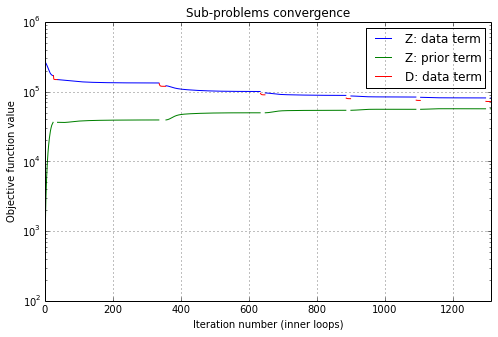

Inner loop: 1314 iterations
g(Z) = ||X-DZ||_2^2 = 7.192160e+04
rdiff: 5.52630858948e-05
i(Z) = ||Z||_1 = 5.660139e+04
j(Z) = tr(Z^TLZ) = 8.681122e+03


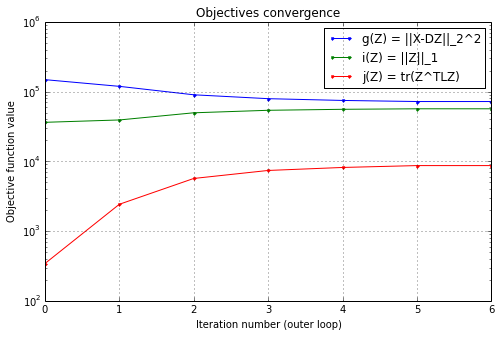

Global objective: 1.372041e+05


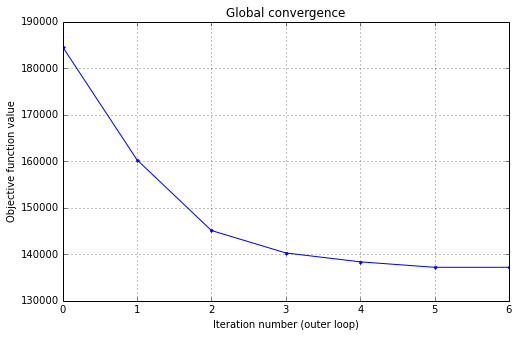

Outer loop: 7 iterations

Z in [-0.125608801842, 1.03517985344]
Sparsity of Z: 3,793,973 non-zero entries out of 19,072,000 entries, i.e. 19.9%.


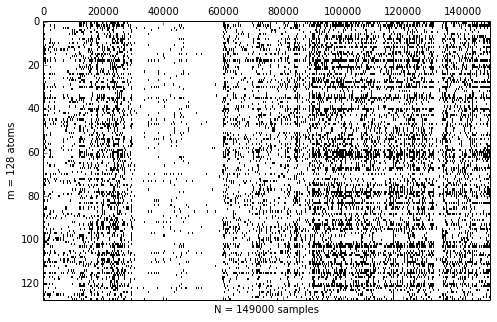

D in [-0.0457091145217, 0.892917752266]
d in [0.999999642372, 1.00000023842]
Constraints on D: True


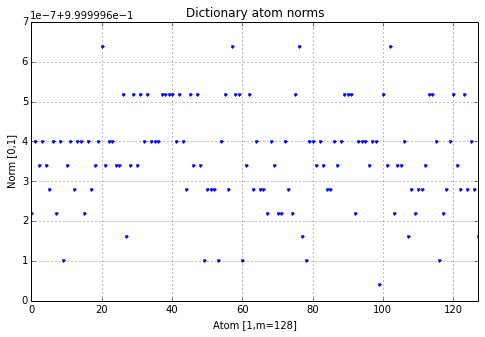

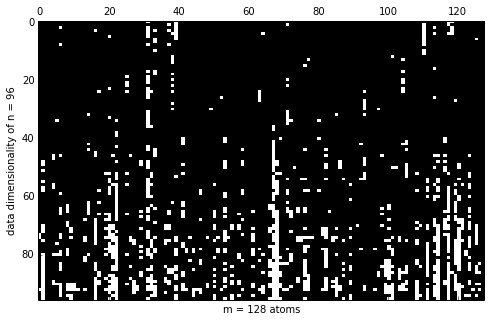

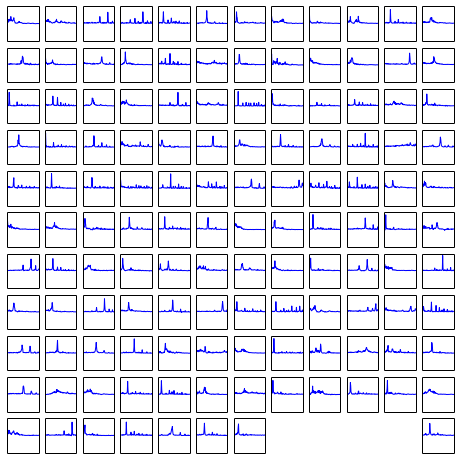

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2824 seconds

 -------------------- Classification, test_size = 0.1 -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,00

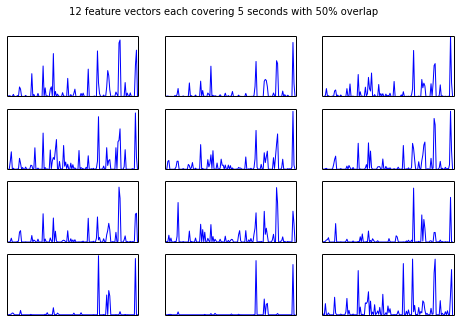

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.9 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.3 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  77 (+/- 2.3) <- [77 74 77 77 70 77 76 79 79 76]
  78 (+/- 1.3) <- [77 77 79 75 80 77 78 78 77 78]
  79 (+/- 1.6) <- [79 76 78 78 80 82 78 76 79 77]
  78 (+/- 1.7) <- [79 73 77 77 78 77 78 79 78 78]
  78 (+/- 0.8) <- [78 78 78 77 77 77 78 77 77 76]
  79 (+/- 1.1) <- [78 77 78 80 79 79 77 80 78 80]
  77 (+/- 0.9) <- [76 76 77 77 77 76 77 76 78 78]
  77 (+/- 1.2) <- [75 78 78 76 77 78 77 77 75 79]
  78 (+/- 1.3) <- [7

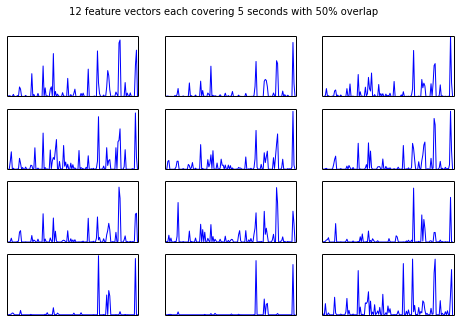

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.9 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.3 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 4200.0 training, 1800.0 testing
  77 (+/- 1.2) <- [77 74 77 76 74 76 75 78 76 77]
  77 (+/- 0.8) <- [77 77 76 75 77 78 77 77 76 78]
  78 (+/- 0.8) <- [78 76 76 77 77 78 77 77 78 76]
  77 (+/- 0.9) <- [77 74 77 77 76 78 76 77 76 77]
  77 (+/- 0.7) <- [77 77 78 76 76 77 76 76 77 78]
  78 (+/- 0.8) <- [77 78 78 79 78 76 76 77 78 77]
  78 (+/- 0.8) <- [77 78 78 79 78 76 78 77 78 76]
  77 (+/- 0.8) <- [75 78 77 77 77 78 78 76 76 77]
  78 (+/- 0.9) <- [

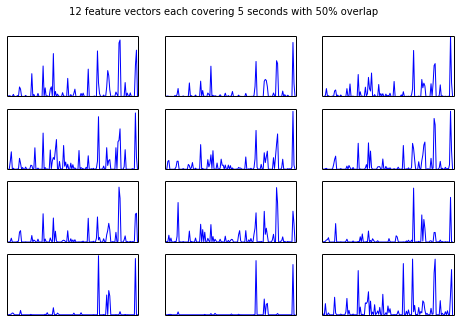

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.9 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.3 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 3000.0 training, 3000.0 testing
  76 (+/- 0.9) <- [76 75 75 75 74 75 76 77 74 76]
  76 (+/- 0.5) <- [75 75 75 75 75 75 76 75 76 76]
  76 (+/- 0.6) <- [77 75 76 75 75 76 76 75 76 76]
  76 (+/- 0.9) <- [76 75 76 75 75 78 75 75 75 75]
  76 (+/- 0.8) <- [77 75 78 76 76 76 75 75 77 76]
  76 (+/- 0.6) <- [76 77 76 76 77 75 75 75 75 76]
  76 (+/- 0.9) <- [76 76 76 76 77 75 76 75 77 75]
  76 (+/- 0.6) <- [75 76 76 75 75 76 76 76 75 76]
  76 (+/- 0.8) <- [

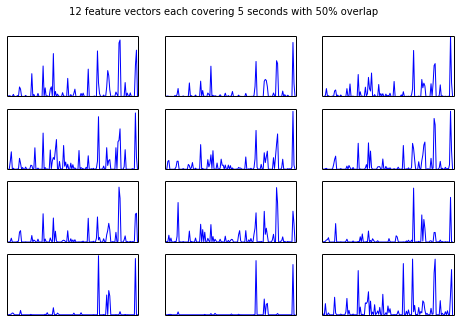

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.9 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.3 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 1800.0 training, 4200.0 testing
  74 (+/- 0.7) <- [75 73 73 73 73 74 73 73 73 74]
  74 (+/- 0.6) <- [73 73 74 74 72 74 73 73 72 74]
  74 (+/- 0.5) <- [74 74 74 72 74 73 74 74 73 73]
  74 (+/- 0.6) <- [74 73 74 73 74 74 73 72 73 73]
  74 (+/- 0.8) <- [74 73 74 73 73 73 71 74 74 73]
  74 (+/- 0.9) <- [73 74 74 73 75 72 74 73 74 74]
  74 (+/- 0.4) <- [73 73 73 73 73 74 74 74 74 73]
  74 (+/- 0.9) <- [73 73 75 74 72 73 75 73 72 74]
  74 (+/- 0.7) <- [

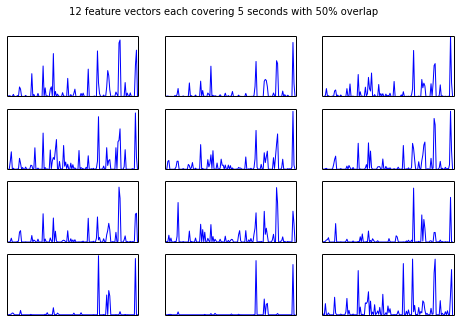

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.9 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.3 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 128), float64
Labels: (6000,), uint8
Ratio: 600.0 training, 5400.0 testing
  66 (+/- 0.7) <- [66 67 65 65 66 65 66 66 67 65]
  67 (+/- 0.8) <- [65 67 67 66 66 66 65 66 66 67]
  66 (+/- 0.8) <- [67 64 66 65 66 66 67 66 65 67]
  67 (+/- 0.7) <- [67 68 67 67 67 67 66 66 66 66]
  67 (+/- 0.7) <- [66 66 68 67 67 67 66 66 66 67]
  66 (+/- 0.7) <- [66 65 66 65 67 66 66 65 67 67]
  67 (+/- 0.6) <- [67 66 67 66 66 67 66 67 65 66]
  66 (+/- 0.9) <- [64 64 66 66 66 65 67 65 66 65]
  67 (+/- 0.5) <- [6

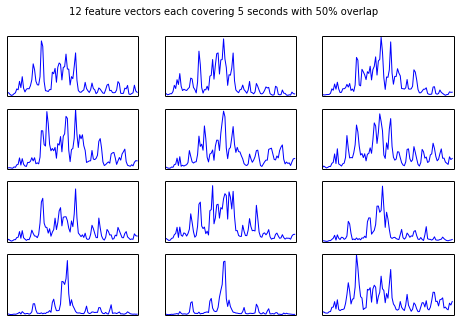

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 5400.0 training, 600.0 testing
  69 (+/- 2.2) <- [70 68 71 67 64 67 70 68 72 66]
  69 (+/- 1.4) <- [71 68 67 67 72 69 67 70 69 70]
  70 (+/- 2.0) <- [71 69 73 68 68 71 71 68 71 66]
  69 (+/- 1.4) <- [70 67 66 67 67 70 68 70 70 68]
  70 (+/- 2.4) <- [71 69 72 68 70 75 71 68 68 66]
  71 (+/- 0.7) <- [71 71 70 70 71 71 70 69 70 70]
  70 (+/- 1.4) <- [70 68 72 69 69 67 71 69 70 69]
  70 (+/- 1.5) <- [69 70 68 71 65 70 70 69 70 69]
  69 (+/- 1.7) <- [68 6

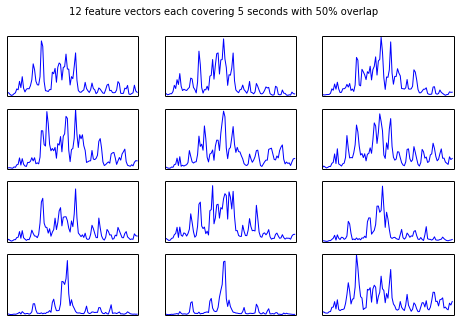

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 4200.0 training, 1800.0 testing
  68 (+/- 1.3) <- [69 68 69 66 66 68 68 70 68 68]
  69 (+/- 0.7) <- [69 70 67 69 68 69 69 69 68 69]
  69 (+/- 0.9) <- [70 69 69 68 69 70 69 68 70 67]
  69 (+/- 0.9) <- [70 68 68 68 68 69 68 68 69 70]
  70 (+/- 0.4) <- [69 69 70 69 69 69 69 69 69 68]
  69 (+/- 1.2) <- [70 71 68 71 70 68 67 67 68 69]
  69 (+/- 0.9) <- [69 68 70 68 68 69 71 67 70 68]
  69 (+/- 0.8) <- [68 69 67 69 68 70 69 69 69 69]
  69 (+/- 0.7) <- [69 

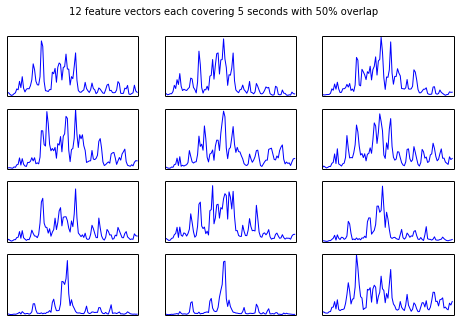

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 3000.0 training, 3000.0 testing
  68 (+/- 0.7) <- [68 67 68 66 66 67 67 68 68 68]
  68 (+/- 0.7) <- [67 68 69 68 66 68 68 67 67 68]
  68 (+/- 0.6) <- [68 68 68 67 67 68 69 67 68 67]
  68 (+/- 0.7) <- [68 68 67 67 68 68 67 66 68 67]
  68 (+/- 0.6) <- [68 67 69 68 69 69 68 68 68 67]
  68 (+/- 0.7) <- [68 68 67 68 70 68 68 67 67 68]
  68 (+/- 0.7) <- [69 67 68 67 67 67 67 67 66 67]
  68 (+/- 0.6) <- [67 68 67 67 69 68 67 67 67 66]
  68 (+/- 0.8) <- [66 

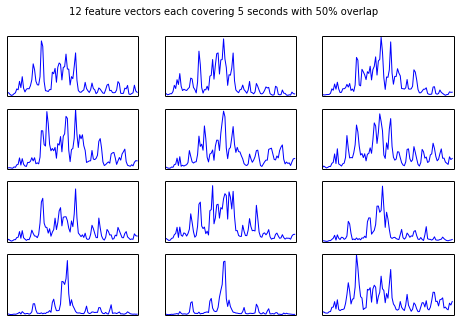

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 1800.0 training, 4200.0 testing
  66 (+/- 0.6) <- [66 66 65 65 65 66 66 67 66 66]
  66 (+/- 0.4) <- [65 66 66 66 65 65 66 66 65 66]
  66 (+/- 0.7) <- [66 67 65 65 66 66 67 65 66 65]
  67 (+/- 0.2) <- [66 66 66 66 66 66 67 66 66 66]
  67 (+/- 0.6) <- [67 66 66 66 66 66 65 66 66 66]
  66 (+/- 0.6) <- [66 66 66 67 67 66 66 66 64 66]
  66 (+/- 0.5) <- [66 65 66 67 65 66 66 66 65 66]
  66 (+/- 0.5) <- [65 66 66 66 66 66 66 65 65 65]
  66 (+/- 0.7) <- [65 

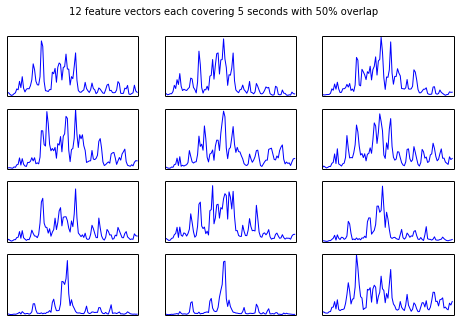

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (6000, 96), float64
Labels: (6000,), uint8
Ratio: 600.0 training, 5400.0 testing
  61 (+/- 1.2) <- [60 61 60 58 62 61 62 60 61 62]
  61 (+/- 0.8) <- [59 60 59 60 61 61 61 61 59 60]
  61 (+/- 0.6) <- [61 59 60 60 61 60 61 60 60 61]
  61 (+/- 0.8) <- [62 61 60 61 60 62 61 60 62 60]
  61 (+/- 1.0) <- [60 60 61 62 62 60 59 63 60 60]
  61 (+/- 0.7) <- [60 61 59 59 61 61 60 61 61 61]
  61 (+/- 1.0) <- [61 61 59 60 60 60 61 61 59 62]
  61 (+/- 1.0) <- [60 62 60 61 59 59 62 62 62 60]
  61 (+/- 0.9) <- [61 5

In [6]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if regen_baseline:
    res['baseline'] = []
    res['baseline_std'] = []
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
        res['baseline'].append(accuracy)
        res['baseline_std'].append(accuracy_std)
else:
    separator('Baseline')
    %run audio_classification.ipynb
    res['baseline'] = len(Pvalues) * [accuracy]
    res['baseline_std'] = accuracy_std

## Results

test_size = [0.1, 0.3, 0.5, 0.7, 0.9]
res['accuracy_std'] = [1.5715966315254757, 0.9443928090459911, 0.74437736845411029, 0.68784711913117158, 0.91044216164357028]
res['objective_j'] = [8681.121826171875, 8681.121826171875, 8681.121826171875, 8681.121826171875, 8681.121826171875]
res['objective_i'] = [56601.39453125, 56601.39453125, 56601.39453125, 56601.39453125, 56601.39453125]
res['objective_h'] = [0, 0, 0, 0, 0]
res['objective_g'] = [71921.5966796875, 71921.5966796875, 71921.5966796875, 71921.5966796875, 71921.5966796875]
res['baseline'] = [69.729166666666742, 69.101388888888863, 68.060166666666689, 66.250476190476164, 60.973703703703706]
res['time_features'] = [2816.1098749637604, 2816.1098749637604, 2816.1098749637604, 2816.1098749637604, 2816.1098749637604]
res['baseline_std'] = [1.7102986662503645, 0.95690211162614125, 0.69960065990058462, 0.58584473963407446, 0.85954329596629586]
res['sparsity'] = [19.892895343959733, 19.892895343959733, 19.892895343959733, 19.892895343959733,

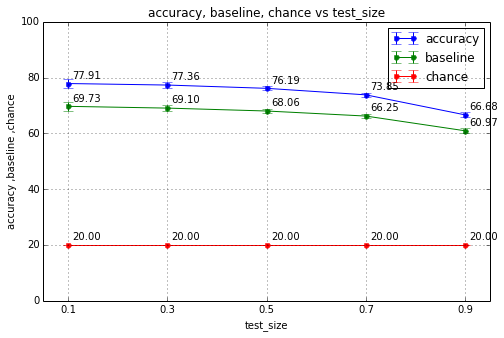

Experiment time: 5122 seconds


In [7]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    if 'ylim' in kwargs:
        plt.ylim(kwargs['ylim'])
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

def div(l):
    div = Pvalues if Pname is l else [p[l]]
    return np.array([1 if v is None else v for v in div])

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err, ylim=[0,100])

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    res['objective_g_un'] = res['objective_g'] / div('ld')
    res['objective_i_un'] = res['objective_i'] / div('ls')
    res['objective_j_un'] = res['objective_j'] / div('lg')
    plot('objective_g_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity', ylim=[0,100])
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))